<a href="https://colab.research.google.com/github/MUMADE-TADM/s1_python-rdvicen1/blob/main/gru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Yahoo finance](https://finance.yahoo.com/)

Librería:[yfinance](https://algotrading101.com/learn/yfinance-guide/)

In [ ]:
!pip install -U yfinance pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 5.8 MB/s 
     |████████████████████████████████| 109 kB 48.0 MB/s 
     |████████████████████████████████| 128 kB 70.3 MB/s 
     |████████████████████████████████| 4.1 MB 77.2 MB/s 
     |████████████████████████████████| 110 kB 92.6 MB/s 
     |████████████████████████████████| 112 kB 85.1 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup

# Datos: Serie multivariante

Valor de cierre del IBEX, BBVA y TELEFONICA(TEF)

In [ ]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr

In [ ]:
yf.pdr_override() # <== that's all it takes :-)
data = yf.download("BBVA TEF ^IBEX", start="2020-01-01", end="2020-10-30")
data.head()

[*********************100%***********************]  3 of 3 completed


Adj Close                        Close                     High  \
                BBVA       TEF        ^IBEX  BBVA   TEF        ^IBEX  BBVA   
Date                                                                         
2020-01-02  4.958455  5.732832  9691.200195  5.72  7.09  9691.200195  5.72   
2020-01-03  4.837094  5.724746  9646.599609  5.58  7.08  9646.599609  5.63   
2020-01-06  4.871768  5.724746  9600.900391  5.62  7.08  9600.900391  5.63   
2020-01-07  4.802420  5.627717  9579.799805  5.54  6.96  9579.799805  5.57   
2020-01-08  4.854431  5.546859  9591.400391  5.60  6.86  9591.400391  5.62   

                                Low                     Open        \
             TEF        ^IBEX  BBVA   TEF        ^IBEX  BBVA   TEF   
Date                                                                 
2020-01-02  7.11  9705.400391  5.63  7.07  9615.099609  5.66  7.09   
2020-01-03  7.09  9650.700195  5.57  7.02  9581.200195  5.58  7.02   
2020-01-06  7.10  9618.200195  5.54  7.03  9492.700195  5.54  7.05   
2020-01-07  7.00  9657.900391  5.52  6.95  9557.900391  5.56  7.00   
2020-01-08  6.90  9604.299805  5.54  6.85  9520.299805  5.54  6.89   

                            Volume                          
                  ^IBEX       BBVA        TEF        ^IBEX  
Date                                                        
2020-01-02  9639.099609  2571200.0  1443300.0  142379600.0  
2020-01-03  9631.200195  3094900.0  1236200.0  135130000.0  
2020-01-06  9585.400391  3995300.0   868400.0  103520400.0  
2020-01-07  9623.099609  3098300.0  1380300.0  133476100.0  
2020-01-08  9535.099609  1981600.0  1747200.0  133957600.0

Los valores **NaN** se sustituyen por una interpolación lineal

salvar datos de valores nulos introduciendole un valor por defecto.

In [ ]:
d=data.loc[:,'Close'].interpolate(limit=2, limit_direction='backward')
d.head()

,BBVA,TEF,^IBEX
Date,,,
2020-01-02,5.72,7.09,9691.200195
2020-01-03,5.58,7.08,9646.599609
2020-01-06,5.62,7.08,9600.900391
2020-01-07,5.54,6.96,9579.799805
2020-01-08,5.60,6.86,9591.400391


## IBEX depende de la semana anterior de BBVA y TELFÓNICA

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Escalanos los datos
dScale = MinMaxScaler()
dScale.fit(d.values)
ldatos=dScale.transform(d.values)

datos normalizados

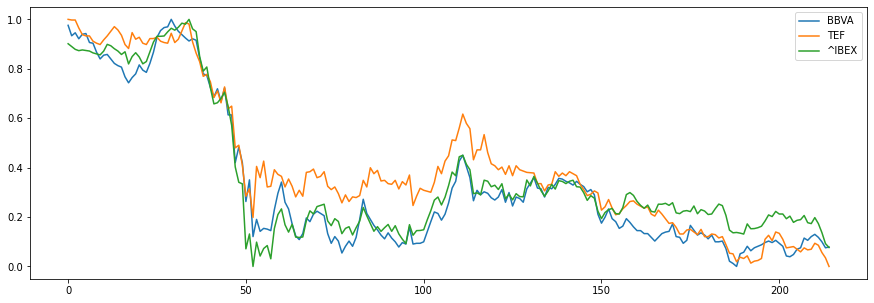

In [ ]:
pd.DataFrame(ldatos,columns=['BBVA','TEF','^IBEX']).plot(figsize=(15,5))

In [ ]:
X,Y=ldatos[:,0:2],ldatos[:,2]

datos de entradas valores del 0 al 1(2 no incluido) y valor de salida el 2

: significa todas

In [ ]:
def windowData(Xi,Yi,window_input=1,window_output=1,step=1):
  Xaux=[]
  Yaux=[]
  #Datos necesarios
  dn=window_input+window_output
  #Calcular cuantos pasos completos podemos realizar
  #sin contar el último bloque [input,output]
  ld=int((len(Xi)-dn)/step)*step
  for i in range(len(Xi)-ld-1,len(Xi)-dn,step):
    Xaux.append(Xi[i:i+window_input])
    Yaux.append(Yi[i+window_input:i+dn])
  return Xaux,Yaux

In [ ]:
#Contruimos los conjunto de datos X e Y
Xw,Yw=windowData(X,Y,window_input=20,window_output=1,step=1)
Xw,Yw=np.array(Xw),np.array(Yw)
Xw.shape

(174, 20, 2)

20 de entrada, los 20 de entrada van a ser 2 valores

## Librerías necesarias 
- [Keras](https://keras.io/)
- [Tensorflow](https://www.tensorflow.org/)

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU
from tensorflow.keras import metrics

## Definir la Red

Definimos nuestro perceptron con las siguientes capas (**layers**)
- Modelo secuencial [Sequential](https://keras.io/api/models/sequential/)
- Capa de entrada: [GRU](https://keras.io/api/layers/recurrent_layers/gru/)
- Capa Densa: [Dense](https://keras.io/api/layers/core_layers/dense/) 

La capa **SimpleRNN** define una unidad recurente con **unit** neuronas de salida y una entrada de **input_shape**

**Recurrente básica**

nueva capa gru

unidad de recurrencia gru con 34 units, activacion relu, input 20 cada elemento 2 dimensiones

capa de salida dense(1)

optimizador rmsprop

mse2 para valor de perdida, ya que estamos haciendo regresion y queremos valores numericos por lo que mse2 encaja bien

In [ ]:
gru = Sequential()
gru.add(GRU(units=34, activation='relu',input_shape=(20,2)))
gru.add(Dense(1))
gru.compile(loss='mean_squared_error', optimizer='rmsprop')
gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 34)                3876      
                                                                 
 dense (Dense)               (None, 1)                 35        
                                                                 
Total params: 3,911
Trainable params: 3,911
Non-trainable params: 0
_________________________________________________________________


In [ ]:
h=gru.fit(Xw,Yw,validation_split=0.30, epochs=15,batch_size=14)

Epoch 1/15
9/9 [==============================] - 2s 36ms/step - loss: 0.0803 - val_loss: 0.0199
Epoch 2/15
9/9 [==============================] - 0s 10ms/step - loss: 0.0420 - val_loss: 0.0107
Epoch 3/15
9/9 [==============================] - 0s 11ms/step - loss: 0.0260 - val_loss: 0.0058
Epoch 4/15
9/9 [==============================] - 0s 8ms/step - loss: 0.0174 - val_loss: 0.0030
Epoch 5/15
9/9 [==============================] - 0s 8ms/step - loss: 0.0129 - val_loss: 0.0023
Epoch 6/15
9/9 [==============================] - 0s 9ms/step - loss: 0.0113 - val_loss: 0.0021
Epoch 7/15
9/9 [==============================] - 0s 9ms/step - loss: 0.0100 - val_loss: 0.0020
Epoch 8/15
9/9 [==============================] - 0s 9ms/step - loss: 0.0092 - val_loss: 0.0027
Epoch 9/15
9/9 [==============================] - 0s 7ms/step - loss: 0.0087 - val_loss: 0.0015
Epoch 10/15
9/9 [==============================] - 0s 8ms/step - loss: 0.0085 - val_loss: 0.0027
Epoch 11/15
9/9 [===================

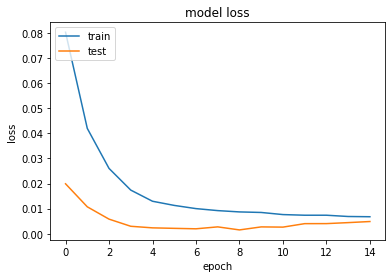

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Utilizar la red
Utilizar el perceptron aprendido con el método [**predict**](https://keras.io/api/models/model_training_apis/#predict-method)

In [ ]:
Y0=gru.predict(Xw)

6/6 [==============================] - 0s 2ms/step


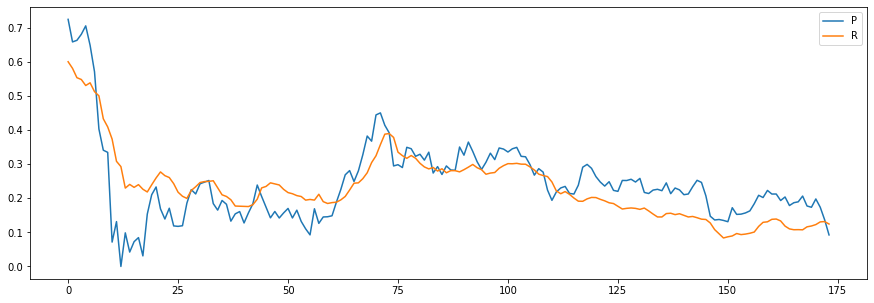

In [ ]:
pd.DataFrame(np.hstack([Yw,Y0]),columns=['P','R']).plot(figsize=(15,5))


## Salvar y Cargar Redes
- Salvar mediante el método [**save**](https://keras.io/api/models/model_saving_apis/#save-method).
- Recuperar un modelo con el método [**load_model**](keras.models.load_model).

In [ ]:
gru.save('gru.h5')
gru2=keras.models.load_model('gru.h5')